# Churn Analysis for a Telecom Dataset from Kaggle

#### <font color='blue'> Done by: Assadullah samir </font>

### Load required libraries

In [2]:
### Load The Required libraries:

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from plotnine import *

In [3]:
# Standard plotly imports

import plotly.plotly as py

import plotly.graph_objs as go

from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode

import cufflinks

cufflinks.go_offline(connected=True)

init_notebook_mode(connected=True)

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Load and Explore the dataset:

The data come from Kaggle; the link ro the dataset is https://www.kaggle.com/becksddf/churn-in-telecoms-dataset. <br>

The dataset has been downloaded and stored in the data folder.

In [5]:
# Read data to a pandas dataframe

df = pd.read_csv('./data/bigml_59c28831336c6604c800002a.csv')

In [118]:
# First look at the df

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
# shape of the dataframe

df.shape

(3333, 21)

In [8]:
# data types in the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [113]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [114]:
# turn area code to str

df['area code'] = df['area code'].astype(str)


<font color='blue'> _* No null values in any of the columns_ </font>


In [119]:
# Overall statistics for first 10 columns:

df.iloc[:,0:10].describe(include='all')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge
count,3333,3333.000000,3333,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000
unique,51,NaN,3,3333,2,2,NaN,NaN,NaN,NaN
top,WV,NaN,415,419-2767,no,no,NaN,NaN,NaN,NaN
freq,106,NaN,1655,1,3010,2411,NaN,NaN,NaN,NaN
mean,NaN,101.064806,NaN,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307
std,NaN,39.822106,NaN,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,74.000000,NaN,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000
50%,NaN,101.000000,NaN,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000
75%,NaN,127.000000,NaN,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000


In [10]:
# Overall statistics for the rest of the columns:

df.iloc[:,10:].describe(include='all')

,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN



<font color='blue'> _** Number of the churned customer in the data is far less than not churned customers_ </font>


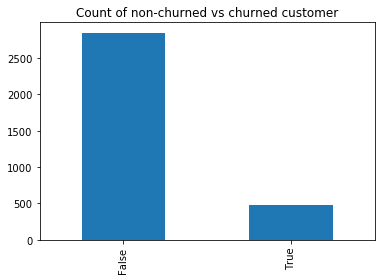

In [11]:
# plot of the churned vs non-churned customer numbers in the data

df.churn.value_counts().plot(kind='bar', title= 'Count of non-churned vs churned customer');

##### Check correlation among the variables:

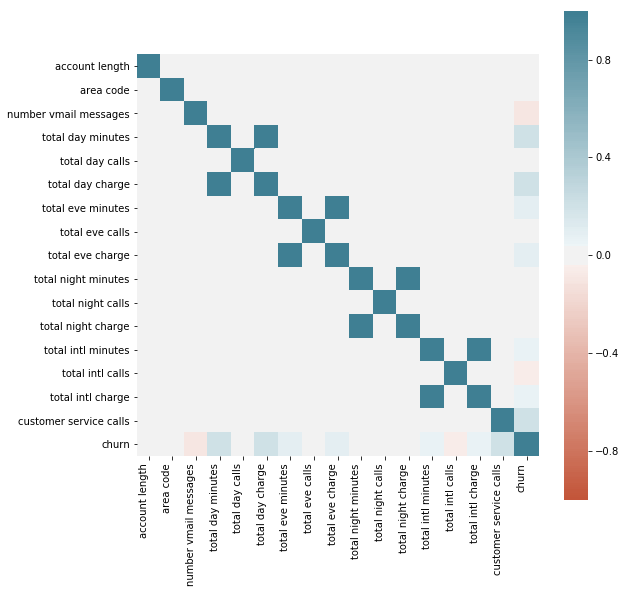

In [51]:
# Correlation among the variables

plt.figure(figsize=[9,9])

corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

<font color='blue'>
    
_* The minutes and charges are strongly correlated._ 

_** Number of voice mail messages and total intl calls have a weak correlation with churn_ 

_*** Customer service calls have a weak correlation with churn._

It would be wise to check these relationships in more details.

</font>

##### Confirmation of strong correlation between minutes and charges:

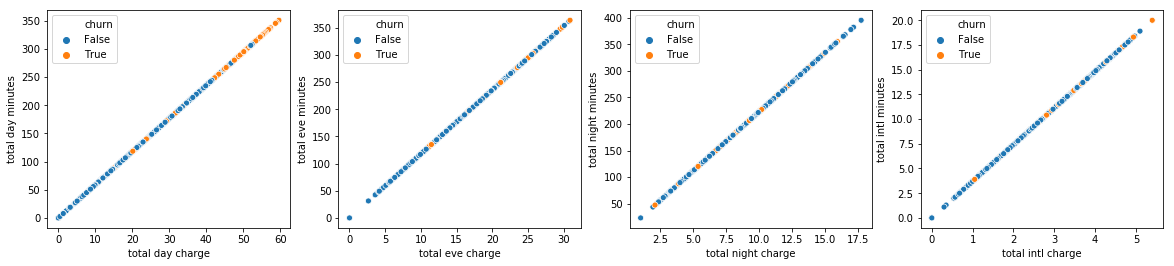

In [342]:
fig, axs = plt.subplots(ncols=4, figsize=[20,4])

sns.scatterplot(x='total day charge', y='total day minutes', hue = 'churn', data=df, ax=axs[0])

sns.scatterplot(x='total eve charge', y='total eve minutes', hue = 'churn', data=df, ax=axs[1])

sns.scatterplot(x='total night charge', y='total night minutes', hue = 'churn', data=df, ax=axs[2]);

sns.scatterplot(x='total intl charge', y='total intl minutes', hue = 'churn', data=df, ax=axs[3]);

<font color='blue'> _perfect correlation, charge/ minutes is constant in respective time segments. Going forward either 
or charges can be used for modelling._ </font>

#### Looking at the interaction among the variables in more details:

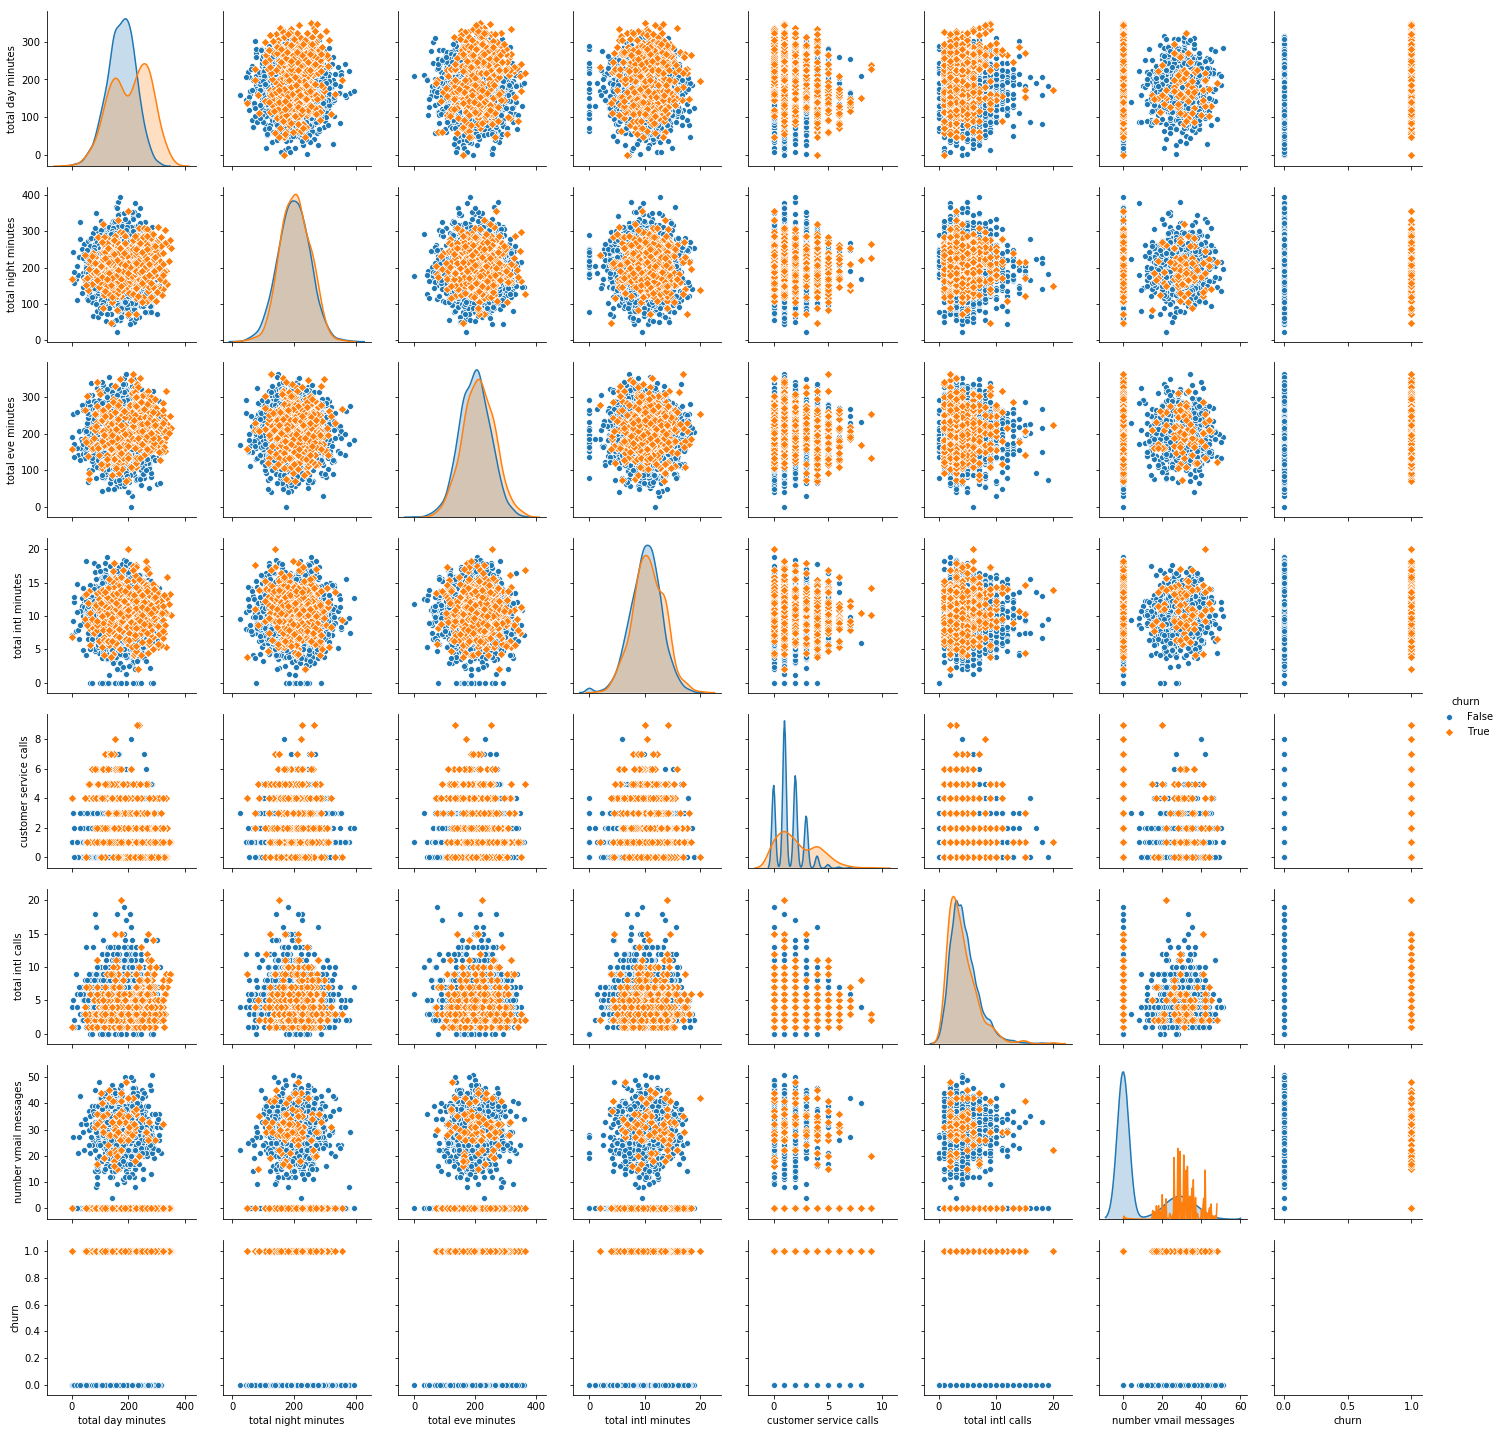

In [168]:
sns.pairplot(df[['total day minutes', 'total night minutes','total eve minutes','total intl minutes',\
                 
                 'customer service calls','total intl calls','number vmail messages','churn']],hue='churn', markers=['o', 'D']);

In [ ]:
## Customer service calls and total day minutes 

<font color='blue'> _Examine customer service calls:_ </font> 

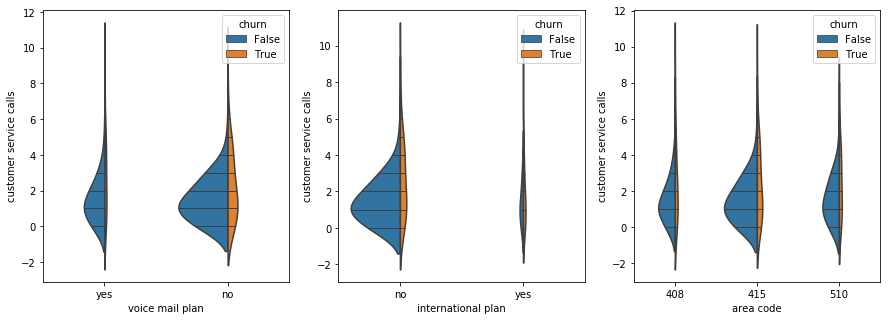

In [142]:
fig, axs = plt.subplots(ncols=3, figsize=[15,5])

sns.violinplot(x='voice mail plan', y='customer service calls', hue='churn', data=df, 
               inner='stick', scale='count', scale_hue=False, split=True, bw=0.6 , ax=axs[0])

sns.violinplot(x='international plan', y='customer service calls', hue='churn', data=df, 
               inner='stick', scale='count', scale_hue=False, split=True, bw=0.6 , ax=axs[1])

sns.violinplot(x='area code', y='customer service calls', hue='churn', data=df, 
               inner='stick', scale='count', scale_hue=False, split=True, bw=0.6 , ax=axs[2]);

In [277]:
df.groupby(['voice mail plan','churn']).agg({'churn':'count','customer service calls':'mean'})\
.rename(columns={'churn':'customer count','customer service calls':'avg_cust_serv_calls'}).reset_index()

,voice mail plan,churn,customer count,avg_cust_serv_calls
0,no,False,2008,1.460657
1,no,True,403,2.158809
2,yes,False,842,1.423990
3,yes,True,80,2.587500


<font color='blue'>
    
_* There seems to be higher ratio of churn among non voice mail plan subcriber._

_** Average customer service call numbers for churned customers are higher for both subcribers and non-subscribers of voice mail plan._

</font>

In [266]:
df.groupby(['international plan','churn']).agg({'churn':'count','customer service calls':'mean'})\
.rename(columns={'churn':'customer count','customer service calls':'avg_cust_serv_calls'}).reset_index()

,international plan,churn,customer count,avg_cust_serv_calls
0,no,False,2664,1.456081
1,no,True,346,2.476879
2,yes,False,186,1.360215
3,yes,True,137,1.605839


<font color='blue'> _*Ratio of churn is higher in the international plan subscribing group!!!_ </font>

----------------------------------------------------------------------------------------------------------------------------

<font color='blue'> _Examine Day minutes:_ </font>

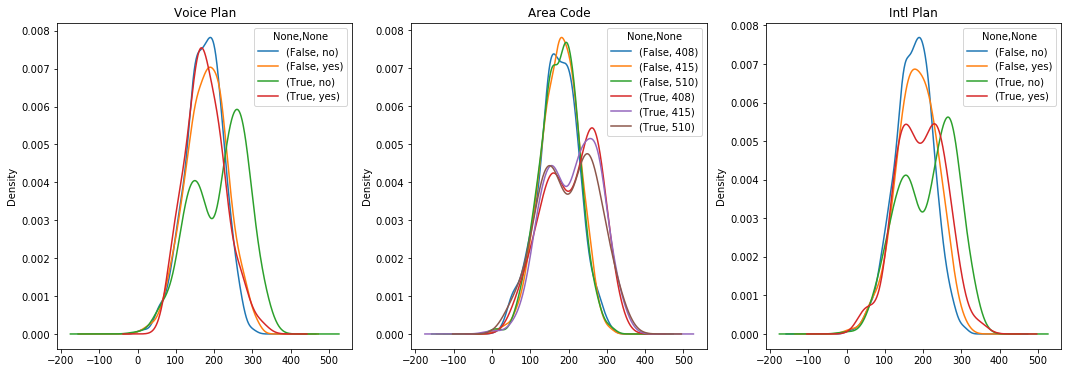

In [273]:
## Examine the bimodality from different perspective:

fig, axs = plt.subplots(ncols=3, figsize=[18,6])

df.groupby(['churn','voice mail plan'])['total day minutes'].plot(kind='kde',legend= True,ax=axs[0]);axs[0].set_title('Voice Plan')

df.groupby(['churn','area code'])['total day minutes'].plot(kind='kde',legend= True,ax=axs[1]);axs[1].set_title('Area Code')

df.groupby(['churn','international plan'])['total day minutes'].plot(kind='kde',legend= True,ax=axs[2]);axs[2].set_title('Intl Plan');

<font color='blue'> _* Most of the churned non-voice mail plan subscribers have higher day minutes._ <br>
_** Bi-modality of day minutes is true for churned customers accross the different area codes._ </font>

### Feature Engineering:

In [280]:
df_new_feat = df

In [339]:
df_new_feat['avg_day_call_duration'] = df_new_feat['total day minutes']/df_new_feat['total day calls']

df_new_feat['avg_eve_call_duration'] = df_new_feat['total eve minutes']/df_new_feat['total eve calls']

df_new_feat['avg_night_call_duration'] = df_new_feat['total night minutes']/df_new_feat['total night calls']

df_new_feat['avg_intl_call_duration'] = df_new_feat['total intl minutes']/df_new_feat['total intl calls']

churn
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: avg_day_call_duration, dtype: object

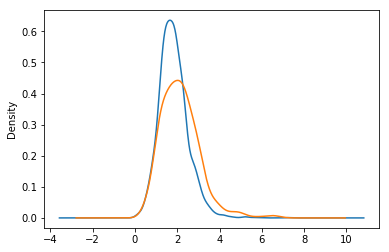

In [344]:
df_new_feat.groupby('churn')['avg_day_call_duration'].plot(kind='kde')

In [301]:
df_new_feat['total min'] = df_new_feat['total day minutes'] + df_new_feat['total eve minutes'] + df_new_feat['total night minutes']

In [332]:
df_new_feat['day_min_ratio'] = df_new_feat['total day minutes'] /df_new_feat['total min']

df_new_feat['eve_min_ratio'] = df_new_feat['total eve minutes'] /df_new_feat['total min']

df_new_feat['night_min_ratio'] = df_new_feat['total night minutes'] /df_new_feat['total min']

churn
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: night_min_ratio, dtype: object

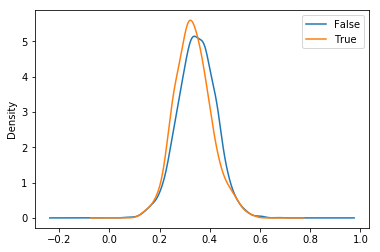

In [338]:
df_new_feat.groupby('churn')['night_min_ratio'].plot(kind='kde',legend=True)

In [310]:
df_new_feat['night_min_ratio'] = df_new_feat['total night minutes'] /df['total min']

churn  voice mail plan
False  no                 AxesSubplot(0.125,0.125;0.775x0.755)
       yes                AxesSubplot(0.125,0.125;0.775x0.755)
True   no                 AxesSubplot(0.125,0.125;0.775x0.755)
       yes                AxesSubplot(0.125,0.125;0.775x0.755)
Name: day_min_ratio, dtype: object

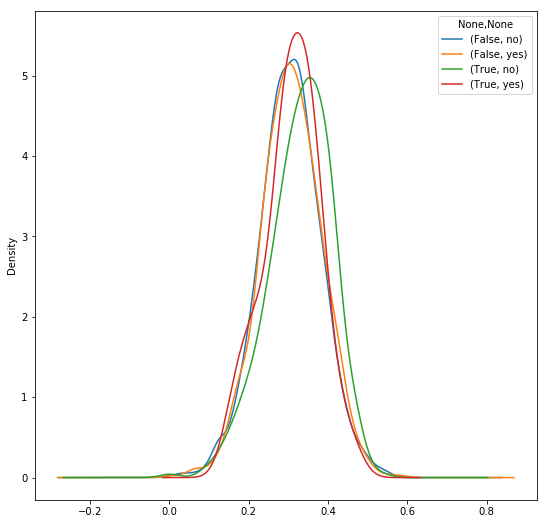

In [319]:
plt.figure(figsize=[9,9])
df_new_feat.groupby(['churn','voice mail plan'])['day_min_ratio'].plot(kind='kde',legend=True)

In [352]:
df_new_feat['cust_call_per_min_usage']=df_new_feat['customer service calls']/df_new_feat['total min']

churn
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: cust_call_per_min_usage, dtype: object

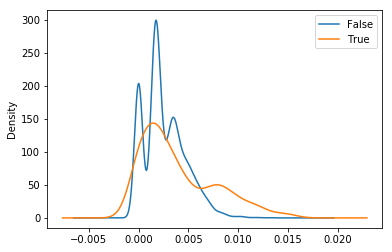

In [353]:
df_new_feat.groupby(['churn'])['cust_call_per_min_usage'].plot(kind='kde',legend=True)

In [322]:
df_new_feat['cust_call_per_length']=df_new_feat['customer service calls']/df_new_feat['account length']

churn
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: cust_call_per_length, dtype: object

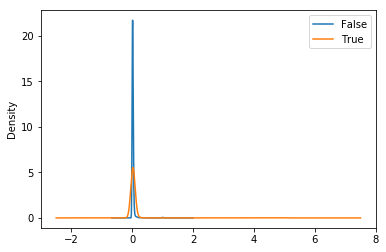

In [323]:
df_new_feat.groupby(['churn'])['cust_call_per_length'].plot(kind='kde',legend=True)

state                      2636
account length             2636
area code                  2636
phone number               2636
international plan         2636
voice mail plan            2636
number vmail messages      2636
total day minutes          2636
total day calls            2636
total day charge           2636
total eve minutes          2636
total eve calls            2636
total eve charge           2636
total night minutes        2636
total night calls          2636
total night charge         2636
total intl minutes         2636
total intl calls           2636
total intl charge          2636
customer service calls     2636
churn                      2636
avg_day_call_duration      2634
avg_intl_call_duration     2621
day_vs_intl                2636
day_vs_eve                 2636
total min                  2636
day_min_ratio              2636
eve_min_ratio              2636
night_min_ratio            2636
cust_call_per_min_usage    2636
cust_call_per_length       2636
avg_eve_

In [100]:
df.groupby(['international plan','churn']).agg({'churn':'count', 'customer service calls':'mean'})\
    .rename(columns={'churn':'count_of_customers','customer service calls':'avg_cust_serv_calls'}).reset_index()

,international plan,churn,count_of_customers,avg_cust_serv_calls
0,no,False,2664,1.456081
1,no,True,346,2.476879
2,yes,False,186,1.360215
3,yes,True,137,1.605839


In [29]:
charges_col = df.columns[df.columns.to_series().str.contains('charge')].to_list()

In [31]:
charges_col.append('churn')

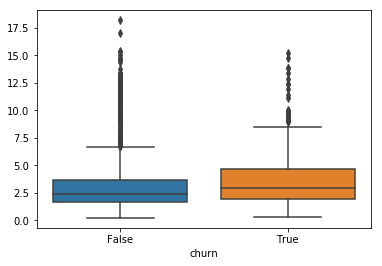

In [109]:
sns.boxplot(df['churn'],df['total intl minutes'] / df['total intl calls']);

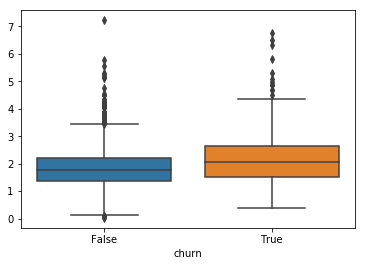

In [108]:
sns.boxplot(df['churn'],df['total day minutes'] / df['total day calls']);

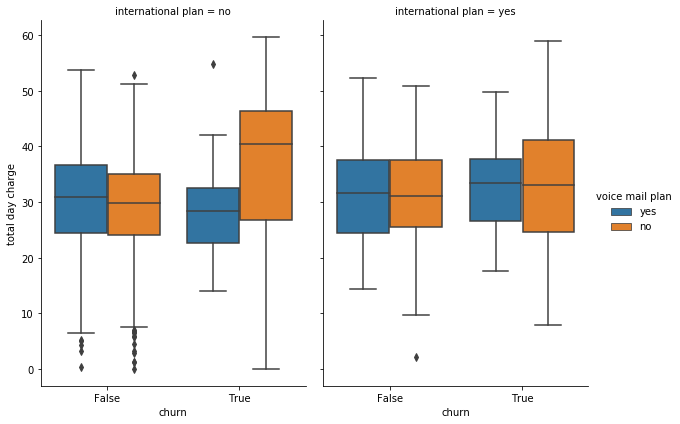

In [49]:
g = sns.catplot(x="churn", y="total day charge",
                 hue="voice mail plan", col="international plan",
                 data=df, kind="box",
                 height=6, aspect=.7);

In [24]:
X_onehot = pd.get_dummies(X)

In [25]:
dtree.fit(X_onehot,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
names = ['True','False']

In [116]:
for column in df.drop(['phone number'], axis=1).select_dtypes(include=['object']).columns:
    if column != 'churn':
        display(pd.crosstab(index=df[column], columns=df['churn'], normalize='columns'))



churn,False,True
state,,
AK,0.017193,0.006211
AL,0.025263,0.016563
AR,0.015439,0.022774
AZ,0.021053,0.008282
CA,0.008772,0.018634
CO,0.020000,0.018634
CT,0.021754,0.024845
DC,0.017193,0.010352
DE,0.018246,0.018634


churn,False,True
area code,,
408,0.251228,0.252588
415,0.497895,0.488613
510,0.250877,0.258799


churn,False,True
international plan,,
no,0.934737,0.716356
yes,0.065263,0.283644


churn,False,True
voice mail plan,,
no,0.704561,0.834369
yes,0.295439,0.165631


In [ ]:
xgb.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        silent=0,
                        objective='binary:logistic',
                        num_round=100)

xgb.fit({'train': s3_input_train, 'validation': s3_input_validation}) 